In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('ModeChoiceOptima.txt', sep="\t", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,ID,DestAct,NbTransf,TimePT,WalkingTimePT,WaitingTimePT,CostPT,CostCar,TimeCar,NbHousehold,...,FreqTripHouseh,Region,distance_km,Choice,InVehicleTime,ModeToSchool,ReportedDuration,CoderegionCAR,age,Weight
1,10350017,2,4,85,23,10,12.4,3.17,32,2,...,4,1,30,1,52,3,255,1,27,0.000378621
2,10350020,1,4,108,26,16,12.4,3.28,30,2,...,4,1,32,-1,66,3,150,1,28,0.000340556
3,10350025,11,2,82,33,5,3,0.45,6,-1,...,2,1,4.5,0,44,-1,20,1,-1,0.000367986
4,10350075,1,3,107,21,31,24,2.36,23,2,...,1,1,25,1,55,-1,30,1,63,0.000367986


In [2]:
#data.describe()
# Renaming correctly the columns of pandas data
columnsID = data.columns
featureNames = data.iloc[0, :]
NameDictionary = dict(zip(columnsID, featureNames))
data.rename(columns = NameDictionary, inplace = True)
data.drop(index=data.index[0], axis=0, inplace=True)
data.head()

,ID,DestAct,NbTransf,TimePT,WalkingTimePT,WaitingTimePT,CostPT,CostCar,TimeCar,NbHousehold,...,FreqTripHouseh,Region,distance_km,Choice,InVehicleTime,ModeToSchool,ReportedDuration,CoderegionCAR,age,Weight
1,10350017,2,4,85,23,10,12.4,3.17,32,2,...,4,1,30,1,52,3,255,1,27,0.000378621
2,10350020,1,4,108,26,16,12.4,3.28,30,2,...,4,1,32,-1,66,3,150,1,28,0.000340556
3,10350025,11,2,82,33,5,3,0.45,6,-1,...,2,1,4.5,0,44,-1,20,1,-1,0.000367986
4,10350075,1,3,107,21,31,24,2.36,23,2,...,1,1,25,1,55,-1,30,1,63,0.000367986
5,10350085,1,5,190,116,18,10.8,1.16,14,3,...,3,1,12.5,1,56,-1,20,1,57,0.000409116


In [3]:
regions = {1:'Vaud', 2:'Valais', 3:'Delemont', 4:'Bern', 5:'Basel, Aargau, Olten', 6:'Zurich', 7:'Eastern Switzerland', 8:'Graubunden'}

def RegionGraph (featName, dat, exclusions):
    if isinstance(featName, str) and all(isinstance(item, int) for item in exclusions):

        stdOutput = np.zeros(8)
        meanOutput = np.zeros(8)
        for i in range(1, 9):
            regID = str(i)
            # Create dataset grouped by region
            RegionData = dat.loc[dat['CoderegionCAR'] == regID]
            # Isolate the specified column/feature
            FeatArr = np.array(RegionData[featName])
            # convert to floats
            intFeat = np.array([float(numero) for numero in FeatArr])
            #print(type(intEdu))
            #print(len(intEdu))
            # delete data that we want to be excluded
            for value in exclusions:
                intFeat = np.delete(intFeat, np.where(intFeat == value)[0])
            #cleanFeat = np.delete(intEdu, np.where(intEdu == -1)[0])
            #cleanFeat = np.delete(cleanEdu, np.where(cleanEdu == -2)[0])
            #print(len(cleanEdu))
            meanOutput[i - 1] = intFeat.mean()
            stdOutput[i - 1] = np.std(intFeat)
        return meanOutput, stdOutput
    else:
        print('"featName" should be a string! It is of type {}', type(featName))
        print('"exclusions" should be a list of integers! It is of type {}', type(exlusions))
        return None

def UrbRurGraph (featName, dat, exclusions):
    if isinstance(featName, str) and all(isinstance(item, int) for item in exclusions):

        stdOutput = np.zeros(2)
        meanOutput = np.zeros(2)
        for i in range(1, 3):
            regID = str(i)
            # Create dataset grouped by region
            RegionData = dat.loc[dat['UrbRur'] == regID]
            # Isolate the specified column/feature
            FeatArr = np.array(RegionData[featName])
            # convert to integers
            intFeat = np.array([float(numero) for numero in FeatArr])
            #print(type(intEdu))
            #print(len(intEdu))
            # delete data that we want to be excluded
            for value in exclusions:
                intFeat = np.delete(intFeat, np.where(intFeat == value)[0])
            #cleanFeat = np.delete(intEdu, np.where(intEdu == -1)[0])
            #cleanFeat = np.delete(cleanEdu, np.where(cleanEdu == -2)[0])
            #print(len(cleanEdu))
            meanOutput[i - 1] = intFeat.mean()
            stdOutput[i - 1] = np.std(intFeat)
        return meanOutput, stdOutput
    else:
        print('"featName" should be a string! It is of type {}', type(featName))
        print('"exclusions" should be a list of integers! It is of type {}', type(exlusions))
        return None

[123.1147541  119.20318725  93.93421053 117.25306122 121.78033473
 108.94239631 109.27402135  89.71428571]
[ 75.01604164 108.75390981  72.315252    83.32479628  98.15236571
  86.9567078   97.54597238  85.29672803]


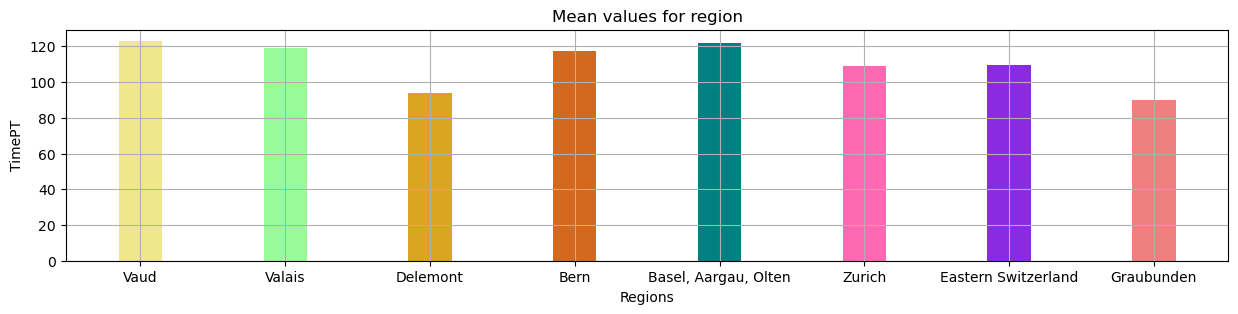

In [4]:
FeatureName = 'TimePT'
meanOut, stdOut = RegionGraph(FeatureName, data, [-1, -2])
print(meanOut)
print(stdOut)
RegColors = ['khaki', 'palegreen', 'goldenrod', 'chocolate', 'teal', 'hotpink', 'blueviolet', 'lightcoral']
plt.figure(figsize=(15,3))
plt.bar(regions.values(), meanOut, width = 0.3, align = 'center', color = RegColors)
#plt.errorbar(regions.values(), meanOut, stdOut, fmt='.', color='Black', elinewidth=2, capthick=5, errorevery=1, alpha=0.5, ms=4, capsize = 2)
plt.grid()
plt.title('Mean values for region')
plt.xlabel('Regions')
plt.ylabel(FeatureName)
plt.show()

[117.20086207 109.86063348]
[90.02454741 92.1718076 ]


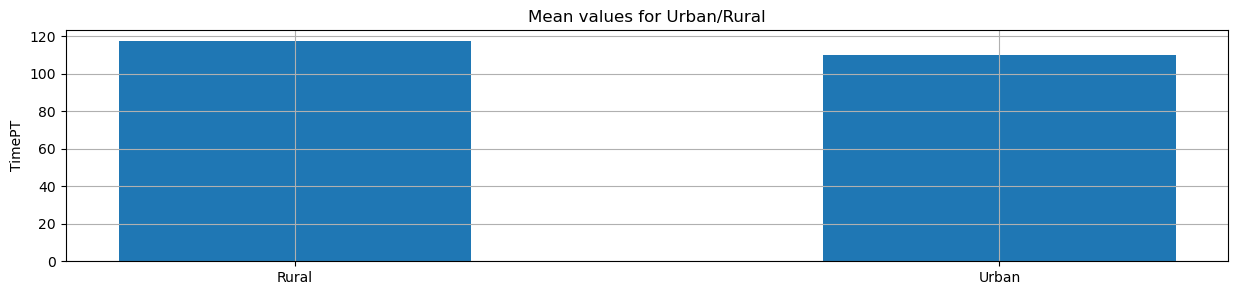

In [5]:
FeatureName = 'TimePT'
meanOut, stdOut = UrbRurGraph(FeatureName, data, [-1, -2])
print(meanOut)
print(stdOut)
#RegColors = ['khaki', 'palegreen', 'goldenrod', 'chocolate', 'teal', 'hotpink', 'blueviolet', 'lightcoral']
plt.figure(figsize=(15,3))
x = ['Rural', 'Urban']
plt.bar(x, meanOut, width = 0.5, align = 'center')
#plt.errorbar(x, meanOut, stdOut, fmt='.', color='Black', elinewidth=2, capthick=5, errorevery=1, alpha=0.5, ms=4, capsize = 2)
plt.grid()
plt.title('Mean values for Urban/Rural')
plt.ylabel(FeatureName)
plt.show()

In [14]:
#This section automatically generates and saves all the region plots.
generatePlots = False
if generatePlots == True :    
    features = list(data.columns.values)
    # Removing some features which would make no sense of taking the average
    ToRemove = ['Weight','ID', 'TripPurpose', 'TypeCommune', 'ClassifCodeLine', 'CoderegionCAR', 'Choice', 'ModeToSchool', 'ResidChild', 'HouseType', 'BirthYear', 'FamilSitu', 'OccupStat', 'SocioProfCat']
    for featRem in ToRemove:
        features.remove(featRem)
    
    #features = ['NbTV', 'Internet']
    #Regions plots
    for FeatureName in features:
        print(f"-> {FeatureName} ...", end='')
        meanOut, stdOut = RegionGraph(FeatureName, data, [-1, -2])
        #print(meanOut)
        #print(stdOut)
        RegColors = ['khaki', 'palegreen', 'goldenrod', 'chocolate', 'teal', 'hotpink', 'blueviolet', 'lightcoral']
        plt.figure(figsize=(15,4))
        plt.bar(regions.values(), meanOut, width = 0.3, align = 'center', color = RegColors)
        #plt.errorbar(regions.values(), meanOut, stdOut, fmt='.', color='Black', elinewidth=2, capthick=5, errorevery=1, alpha=0.5, ms=4, capsize = 2)
        plt.grid()
        plt.title('Mean values for region')
        plt.xlabel('Regions')
        plt.ylabel(FeatureName)
        filename = 'ImgRegions/' + FeatureName + '.png'
        plt.savefig(filename, bbox_inches='tight')
        plt.close()
        print(' SAVED!')
    
    
    print("--- Now working with UrbRur plots.")
    #UrbRur plots
    for FeatureName in features:
        print(f"-> {FeatureName} ...", end='')
        meanOut, stdOut = UrbRurGraph(FeatureName, data, [-1, -2])
        #print(meanOut)
        #print(stdOut)
        #RegColors = ['khaki', 'palegreen', 'goldenrod', 'chocolate', 'teal', 'hotpink', 'blueviolet', 'lightcoral']
        plt.figure(figsize=(15,3))
        x = ['Rural', 'Urban']
        plt.bar(x, meanOut, width = 0.5, align = 'center')
        #plt.errorbar(x, meanOut, stdOut, fmt='.', color='Black', elinewidth=2, capthick=5, errorevery=1, alpha=0.5, ms=4, capsize = 2)
        plt.grid()
        plt.title('Mean values for Urban/Rural')
        plt.ylabel(FeatureName)
        filename = 'ImgUrbRur/' + FeatureName + '.png'
        plt.savefig(filename, bbox_inches='tight')
        plt.close()
        print(' SAVED!')
